### Import the orginal Dataset, Then re run and and scaling and splitting in order to balancec and clean data

## Step 1, 2 

In [8]:
import pandas as pd
import numpy as np
import time
# Found Data Set
# Generally This dataset is about Econmic Freedoms in the world
df = pd.read_csv('efw_cc.csv')
dataframe_copy = df.copy()

In [9]:
dataframe_copy.loc[dataframe_copy['ECONOMIC FREEDOM'] > 5, 'Econ_Freedom_label'] = '1' # Economic Freedom is above 5
dataframe_copy.loc[dataframe_copy['ECONOMIC FREEDOM'] <= 5, 'Econ_Freedom_label'] = '0'# Economic Freedom is between 0 and 5

In [10]:
# I dropped all the rows that are NA in the Predicting categories label (Econ_Freedom_label)
dataframe_copy2 = dataframe_copy.dropna(subset = ["Econ_Freedom_label"], inplace=False)
print("\nOrginal Shape of DataFrame", df.shape, "\nShape of dataframe after dropping values that are NA after Categorizing predictor:", dataframe_copy2.shape)


Orginal Shape of DataFrame (3726, 36) 
Shape of dataframe after dropping values that are NA after Categorizing predictor: (3003, 37)


In [30]:
df

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,1970,VEN,Venezuela,7.18,10.0,1.0,6.602003,9.827430,7.0,NaN,...,9.713677,8.066667,NaN,10.00000,8.000000,8.688889,9.679680,NaN,NaN,5.312277
3722,1970,VNM,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3723,1970,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3724,1970,ZMB,Zambia,NaN,NaN,NaN,3.448131,9.105430,0.0,NaN,...,5.133689,NaN,NaN,0.00000,2.000000,NaN,7.327327,NaN,NaN,NaN


In [31]:
X = dataframe_copy2.drop(['ECONOMIC FREEDOM', 'Econ_Freedom_label', 'ISO_code', 'countries'], axis = 1)
y = dataframe_copy2.Econ_Freedom_label

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)
print(sss)
StratifiedShuffleSplit(n_splits=1, random_state=0, ...)
for train_index, test_index in sss.split(X, y):
   print("TRAIN:", train_index, "TEST:", test_index)
...      X_train, X_test = X[train_index], X[test_index]
...     y_train, y_test = y[train_index], y[test_index]


SyntaxError: invalid syntax (<ipython-input-37-96832b8c2d2e>, line 9)

In [40]:
X_array = X.to_numpy()
y_array = y.to_numpy()

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
split.get_n_splits(X_array, y_array)
print(split)
for train_index , test_index in split.split(X_array, y_array):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index] , y_array[test_index]

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
TRAIN: [  96  578 2560 ...  534 1296   54] TEST: [2562 1587 2094 2844  312  128 2936 2611 1234  887 2157 2173 2775 2529
 2730  453 1119 2912  371 2595 1972 1412  969 1685 1978 2688 1879    6
 1718 1907 1310 2601  743 2878  289  463  885 2477 1103 2310 1210 1833
   57 1106  847 1953  648 2692  747 1670   52 2501 2632 1797  236 2755
 1889 2374 1345  680 1529  983 2152 2073 1300  373  243  861 2279   84
 2430  884 1133 2112  801  829  794   44  727 2015 1265 2790  156 2818
 2972 2816 2065 1445 2976 1561 2660 2433  514  140 1643 2664 2998  331
 2585 1484 2710 1439 1501 2962  120  563 2779  197 2296 1748 2893 1373
 1167  596 1170 1580 2075 2485 2855  293 1668  136 2793 1528 1451   37
  581 2066  994 1285 2422 2641  856 1742 2405 1340  960  929 1749 1577
   21 1046  546 1198 1859  883  544  791 1163 1050 2673 2952  858 1324
 2508 1609 1271 2034  954  762 1472  242  387 2956 2491  538   40 1553
 17

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print("\nTrain Value Spread\n", y_train.value_counts(),
"\nTest Value Spread\n", y_test.value_counts())


Train Value Spread
 1    2144
0     258
Name: Econ_Freedom_label, dtype: int64 
Test Value Spread
 1    537
0     64
Name: Econ_Freedom_label, dtype: int64


In [41]:
X_train

array([[2.01600000e+03, 8.00000000e+00, 1.00000000e+00, ...,
        6.35542380e+00, 7.58697598e+00, 7.74757431e+00],
       [2.01300000e+03, 1.38000000e+02, 4.00000000e+00, ...,
        3.03189256e+00, 5.92884935e+00, 5.56945249e+00],
       [1.99000000e+03, 4.50000000e+01, 2.00000000e+00, ...,
                   nan,            nan, 7.48266335e+00],
       ...,
       [2.01300000e+03, 1.04000000e+02, 3.00000000e+00, ...,
        5.91644597e+00, 6.41313310e+00, 6.62896738e+00],
       [2.00800000e+03, 9.20000000e+01, 3.00000000e+00, ...,
        7.28965445e+00, 4.86167650e+00, 6.17778638e+00],
       [2.01600000e+03, 2.00000000e+01, 1.00000000e+00, ...,
        7.43924995e+00, 8.18673569e+00, 7.98643966e+00]])

In [42]:
dataframe_correlation = pd.concat([dataframe_copy['ECONOMIC FREEDOM'],X_train], axis = 1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [15]:
corr_matrix = dataframe_correlation.corr()
corr_matrix_specific = np.abs(corr_matrix['ECONOMIC FREEDOM'])
top_correlations = corr_matrix_specific.sort_values(ascending = False)

In [16]:
chosen_correlations = top_correlations['4_trade':'4b_regulatory_trade_barriers']

In [17]:
correlation_index = chosen_correlations.index
X_train_corr = X_train.loc[:,correlation_index]
X_test_corr = X_test.loc[:,correlation_index]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train_corr)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_corr),columns = X_train_corr.columns)  
X_test_scaled = pd.DataFrame(scaler.transform(X_test_corr),columns = X_test_corr.columns)

#print("\nShape of Training set:", X_train_scaled.shape, '\nShape of Testing Set:', X_test_scaled.shape)

In [19]:
X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

### Step 3: 


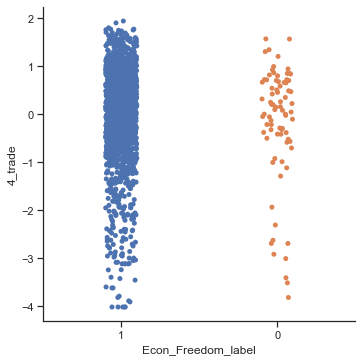

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

training_set = pd.concat([X_train, y_train], axis = 1)
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="Econ_Freedom_label", y="4_trade", data=training_set);

#### This is clearly a categorical variable so it is either going to be I would consider this to binary, the distirbution based upon jus the training set it would appear that this is a binomial distribution just becasue of the fact that it is predicting either 0 or a 1. Later on if there were more variables to identify this would notion would change

# Step 4: 

# KNN

##### I ran into some errors which wouldn't let me use f1 as a scorer, becasue it wasnt able to attribute the positive label aka yes or no of the prediction, So I modiified the F1 scorer to make it so that 1 is yes and 0 is no
###### 1 = greater than 5, 0 is less than or equal to 5. So in other words is the value above 5 Yes everythiing else no. 

#### Base

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

knn_base = KNeighborsClassifier()
knn_base.fit(X_train , y_train)
prediction = knn_base.predict(X_test)
training_predictioin = knn_base.predict(X_train)

print('\nKNN Optimized\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


KNN Optimized


Train Accuracy:  0.9783513738551207

Test Accuracy:  0.9717138103161398

Test - No. Of Correct Predictions 584.0 / 601

Test Confusion Matrix:
[[ 53  11]
 [  6 531]]

Test Precision = 0.971037
Test Recall = 0.971714
Test F1 Score = 0.971204

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        64
           1       0.98      0.99      0.98       537

    accuracy                           0.97       601
   macro avg       0.94      0.91      0.92       601
weighted avg       0.97      0.97      0.97       601



#### Hyperparamater Tuning

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label= '1')
param_grid = {
    'metric':['manhattan', 'minkowski', 'euclidean'],
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, scoring = 'accuracy', cv = 5, n_jobs = 4, verbose = True)
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['manhattan', 'minkowski', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

In [121]:
knn_best_params = grid_knn.best_params_
knn_results = pd.DataFrame(grid_knn.cv_results_)
worst_score = knn_results.loc[np.argmax(knn_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (accuracy): %f" % grid_knn.best_score_)
print("Optimal Hyperparameter Values: ", knn_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (accuracy): 0.969192
Optimal Hyperparameter Values:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Worst Hyperparameter Valeus:  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'uniform'}


#### Optimized

In [122]:
knn2 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 10, weights = 'distance')
knn2.fit(X_train, y_train)
prediction = knn2.predict(X_test)
training_predictioin = knn2.predict(X_train)

print('\nKNN Optimized\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


KNN Optimized


Train Accuracy:  1.0

Test Accuracy:  0.9733777038269551

Test - No. Of Correct Predictions 585.0 / 601

Test Confusion Matrix:
[[ 53  11]
 [  5 532]]

Test Precision = 0.972719
Test Recall = 0.973378
Test F1 Score = 0.972797

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        64
           1       0.98      0.99      0.99       537

    accuracy                           0.97       601
   macro avg       0.95      0.91      0.93       601
weighted avg       0.97      0.97      0.97       601



# Logistic Regression

#### Base

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

logreg_base = LogisticRegression()
logreg_base.fit(X_train, y_train)
prediction = logreg_base.predict(X_test)
print("Training R^2 set score: {:.2f}".format(logreg_base.score(X_train, y_train)))
print("Test R^2 set score: {:.2f}".format(logreg_base.score(X_test, y_test)))

r2 = r2_score(y_test , prediction)
RMSE = mean_squared_error(y_test, prediction)
MAE = mean_absolute_error(y_test, prediction)
print("\nLogistic Regression Base")
print('\nR squared score:', r2, '\nRoot Mean Squared Error:', RMSE, '\nMean Absolute Error', MAE)

Training R^2 set score: 0.98
Test R^2 set score: 0.97

Logistic Regression Base

R squared score: 0.6502560521415269 
Root Mean Squared Error: 0.033277870216306155 
Mean Absolute Error 0.033277870216306155


#### Hyperparamater Tuning

In [113]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

param_grid_log = {
        'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-4,4,20),
        'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 1000, 2500, 5000]
    }



log_grid = GridSearchCV(logreg, param_grid = param_grid_log, scoring = 'neg_root_mean_squared_error', verbose = True, cv=5, n_jobs=4)
log_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 2556 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done 5140 tasks      | elapsed:   49.8s
[Parallel(n_jobs=4)]: Done 7940 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 8000 out of 8000 | elapsed:  1.6min finished
C:\Users\scott\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\scott\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='neg_root_mean_squared_error', verbose=True)

#### Printing out the Best + Worst Performing Paramaters

In [56]:
log_best_params = log_grid.best_params_
log_results = pd.DataFrame(log_grid.cv_results_)
worst_score = log_results.loc[np.argmax(log_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (neg_root_mean_squared_error): %f" % log_grid.best_score_)
print("Optimal Hyperparameter Values: ", log_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (neg_root_mean_squared_error): -0.163087
Optimal Hyperparameter Values:  {'C': 0.23357214690901212, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Worst Hyperparameter Valeus:  {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'}


#### Evaluating the hyperparamater tuning on test data

In [58]:
logreg2 = LogisticRegression(C = 0.23357214690901212, max_iter = 1000, penalty = 'l2', solver = 'saga')
logreg2.fit(X_train , y_train)
prediction = logreg2.predict(X_test)
print("Training R^2 set score: {:.2f}".format(logreg2.score(X_train, y_train)))
print("Test R^2 set score: {:.2f}".format(logreg2.score(X_test, y_test)))

r2 = r2_score(y_test , prediction)
RMSE = mean_squared_error(y_test, prediction)
MAE = mean_absolute_error(y_test, prediction)

print("\nLogistic Regression Optimized")
print('\nR squared score:', r2, '\nRoot Mean Squared Error:', RMSE, '\nMean Absolute Error', MAE)

Training R^2 set score: 0.98
Test R^2 set score: 0.98

Logistic Regression Optimized

R squared score: 0.7872189768100548 
Root Mean Squared Error: 0.019966722129783693 
Mean Absolute Error 0.019966722129783693


# Support Vector Machines

#### Base

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

svm_base = SVC().fit(X_train, y_train)


prediction = svm_base.predict(X_test)
training_predictioin = svm_base.predict(X_train)

print('\SVM Base\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))

\SVM Base


Train Accuracy:  0.9837635303913406

Test Accuracy:  0.9633943427620633

Test - No. Of Correct Predictions 579.0 / 601

Test Confusion Matrix:
[[ 51  13]
 [  9 528]]

Test Precision = 0.962556
Test Recall = 0.963394
Test F1 Score = 0.962872

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        64
           1       0.98      0.98      0.98       537

    accuracy                           0.96       601
   macro avg       0.91      0.89      0.90       601
weighted avg       0.96      0.96      0.96       601



#### Hyperparamater Tuning

In [85]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [101]:
param_grid = {
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'kernel':['linear', 'poly', 'rbf', 'sigmmoid'],
    'gamma':[0.5, 1, 5, 10 ,50, 100, 500, 1000]
}

svm = SVC()
grid_svm = GridSearchCV(svm, param_grid , scorer =f1_scorer, cv = cv, n_jobs = 4)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.5, 1, 5, 10, 50, 100, 500, 1000],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmmoid']})

In [102]:
svm_best_params = grid_svm.best_params_
svm_results = pd.DataFrame(grid_svm.cv_results_)
worst_score = svm_results.loc[np.argmax(svm_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (accuracy): %f" % grid_svm.best_score_)
print("Optimal Hyperparameter Values: ", svm_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (accuracy): 0.978794
Optimal Hyperparameter Values:  {'C': 0.4, 'gamma': 0.5, 'kernel': 'linear'}
Worst Hyperparameter Valeus:  {'C': 0.9, 'gamma': 1000, 'kernel': 'sigmmoid'}


In [95]:
svm2 = SVC(C = 0.4, gamma = 0.5, kernel = 'linear')
svm2.fit(X_train, y_train)
prediction = svm2.predict(X_test)
training_predictioin = svm2.predict(X_train)

print('\SVM Optimized\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))

\SVM Optimized


Train Accuracy:  0.9804329725228976

Test Accuracy:  0.9633943427620633

Test - No. Of Correct Predictions 579.0 / 601

Test Confusion Matrix:
[[ 52  12]
 [ 10 527]]

Test Precision = 0.962932
Test Recall = 0.963394
Test F1 Score = 0.963138

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        64
           1       0.98      0.98      0.98       537

    accuracy                           0.96       601
   macro avg       0.91      0.90      0.90       601
weighted avg       0.96      0.96      0.96       601



#### No real change in F1 or even accuracy between the hyperparamter scaling. 
Default SVC 
- Gamma = "Scale" 
    - this is equal to 1/(number of features * X.varriance) 
- Kernal = rbf
- C = 1.0 


Hyperparamaters 


- Gamma = 0.4
- Kernal = Linear
- C = 0.4 
